# RESEARCH ON CAR SALE ADS

## *Introduction*


The present project aims to determine which factors influence the price of vehicles at Crakshaft List. The proposed data has detailed information about all advertisements for vehicles published on our website every day for the last few years. This study will help understand correlation between price and product characteristics, which could lead to marketing intelligence, suggestions on prices based on available data or a broader understanding of the vehicles sold.

The dataset contains the following fields:

    - price
    - model_year
    - model
    - condition
    - cylinders
    - fuel — gas, diesel, etc.
    - odometer — the vehicle's mileage when the ad was published
    - transmission
    - paint_color
    - is_4wd — whether the vehicle has 4-wheel drive (Boolean type)
    - date_posted — the date the ad was published
    - days_listed — from publication to removal

## *Validating data*

### Objective

The first step is to take a first look at the data and understand what information is available and what can be used. In this step we will validate numerical and categorical values, whether they look reasonable. After that, we can define what data must be looked into to draw conclusions later in the analysis section.
    

### Overall data: duplicated, types and missing


#### Explanation

Here we should check a few entries, check if there are duplicates, missing values or wrong data types. Data types are how the software understands the data: a single algarism of a number could mean a date, a text or its own numerical value. If it doesn't get the correct data types, we won't be able to use our methods of analysis.

#### Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    df = pd.read_csv('/datasets/vehicles_us.csv')
except:
    df = pd.read_csv('vehicles_us.csv')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [2]:
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of duplicates: 0


In [3]:
na_pct = (df.isna().sum()/df.shape[0])
na_pct = na_pct[na_pct != 0]
print(f"Rows with missing values: \n{na_pct}")

Rows with missing values: 
model_year     0.070238
cylinders      0.102086
odometer       0.153168
paint_color    0.179854
is_4wd         0.503697
dtype: float64


In [4]:
df[df['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


In [5]:
df[df['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17


In [6]:
df[df['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43


In [7]:
df[df['paint_color'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8


In [8]:
df[df['is_4wd'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29


#### Results


Our conclusions about the general aspects of the table:

There are no duplicates.

There is no clear reason why data is missing for each of the columns. Except for the column 'is_4wd', the rest of the missing values seem to be missing completely at random and could have been caused by bugs, or information just wasn't added when listing the ads. This should be checked with the corresponding department.

Here are the actions to take:

- Missing data on 'model_year' will be deleted.
- 'cylinders' will be filled based on available information.
- 'odometer' will be filled in with median/mean depending on outliers.
- 'is_4wd' will be filled in with 0, since it is missing False values.

Data types must be changed as follows:

- 'model_year', 'cylinders', 'odometer' will be turned into int.
- 'is_4wd' will be cast as Boolean.
- 'date_posted' will become datetime.

### Checking categorical Data

#### Explanation


It is important to look into the values of categorical data in order to verify categories are not repeated or mispelled. Unique values should be verified and fixed, if necessary. Along that, sometimes data could be more useful using dictionaries for numerical values. Reference tables are interesting because they can quickly be changed according to new labels requirements. In some cases, the numerical values are useful for analysis and plotting. The cols we should look into include: 'model', 'condition', 'fuel', 'transmission', 'type' and 'paint_color'.

#### Code

In [9]:
cat_cols = ['cylinders', 'condition', 'fuel', 'transmission', 'type', 'paint_color', 'is_4wd']
for col in cat_cols:
    print(f"Unique values in column '{str(col)}': {df[col].unique()}\n\n")

Unique values in column 'cylinders': [ 6.  4.  8. nan  5. 10.  3. 12.]


Unique values in column 'condition': ['good' 'like new' 'fair' 'excellent' 'salvage' 'new']


Unique values in column 'fuel': ['gas' 'diesel' 'other' 'hybrid' 'electric']


Unique values in column 'transmission': ['automatic' 'manual' 'other']


Unique values in column 'type': ['SUV' 'pickup' 'sedan' 'truck' 'coupe' 'van' 'convertible' 'hatchback'
 'wagon' 'mini-van' 'other' 'offroad' 'bus']


Unique values in column 'paint_color': [nan 'white' 'red' 'black' 'blue' 'grey' 'silver' 'custom' 'orange'
 'yellow' 'brown' 'green' 'purple']


Unique values in column 'is_4wd': [ 1. nan]




#### Results



In general, categorical data looks good. Only a couples things must be done: 'condition' could use a dictionary and numerical reference; 'is_4wd' apparently uses null values for False.

### Checking Numerical Data

#### Explanation


Here we will quickly go over the description of numerical columns to check if there are values too far off the expected values. We use some indexes such as average value, median, count and frequency of values to 

#### Code

In [10]:
num_cols = ['price', 'model_year', 'odometer', 'days_listed']
df[num_cols].describe()

,price,model_year,odometer,days_listed
count,51525.000000,47906.000000,43633.000000,51525.00000
mean,12132.464920,2009.750470,115553.461738,39.55476
std,10040.803015,6.282065,65094.611341,28.20427
min,1.000000,1908.000000,0.000000,0.00000
25%,5000.000000,2006.000000,70000.000000,19.00000
50%,9000.000000,2011.000000,113000.000000,33.00000
75%,16839.000000,2014.000000,155000.000000,53.00000
max,375000.000000,2019.000000,990000.000000,271.00000


#### Results

Although most of the data looks reasonable, we can see the minimum value for price is 1, and that must be looked into. However, there doesn't seem to have too many outliers for any of the columns.

### Checking String Data


#### Explanation

Here we will take a look at information such as dates and models of cars. This information can have a lot of unique entries, and we can check it in order to get an overview of these columns.

#### Code

In [11]:
str_cols = ['date_posted', 'model']

for col in str_cols:
    print(sorted(df[col].unique()[1:100]), '\n')

['2018-05-02', '2018-05-03', '2018-05-05', '2018-05-06', '2018-05-09', '2018-05-11', '2018-05-15', '2018-05-16', '2018-05-17', '2018-05-19', '2018-05-27', '2018-05-29', '2018-06-01', '2018-06-02', '2018-06-04', '2018-06-08', '2018-06-11', '2018-06-16', '2018-06-20', '2018-06-30', '2018-07-01', '2018-07-08', '2018-07-12', '2018-07-15', '2018-07-16', '2018-07-19', '2018-07-20', '2018-07-22', '2018-07-24', '2018-07-26', '2018-07-27', '2018-08-05', '2018-08-07', '2018-08-16', '2018-08-22', '2018-08-25', '2018-09-08', '2018-09-10', '2018-09-13', '2018-09-15', '2018-09-17', '2018-09-20', '2018-09-22', '2018-09-23', '2018-09-25', '2018-10-09', '2018-10-13', '2018-10-18', '2018-10-19', '2018-10-22', '2018-10-25', '2018-10-26', '2018-10-28', '2018-10-30', '2018-11-07', '2018-11-08', '2018-11-12', '2018-11-18', '2018-11-26', '2018-11-27', '2018-11-29', '2018-12-14', '2018-12-20', '2018-12-24', '2018-12-25', '2018-12-27', '2018-12-30', '2019-01-05', '2019-01-07', '2019-01-12', '2019-01-13', '2019

#### Results

The data for dates will be turned into 'datetime' in order to be analyzed. The format is YYYY-mm-dd.

### Conclusion

The outline of data has been drawn. An initial guess of the most prominent columns are car type, number of cylinders, model year and mileage. A thorough study could be done using car models, but that can be used as a last resort.

Problems outlined:
- Some prices are too low.
- Data is missing in some columns: model_year, is_4wd, cylinders, odometer
- Some data types must be corrected: is_4wd into 'bool', numeric data into 'int' and dates into 'datetime'


## *Data preprocessing*

### Objective

In this stage, issues found when validating the data will be fixed. This step is strictly necessary to achieve results, as applying functions to data containing wrong values could generate many errors and additional efforts.

### Filling in missing values

#### Explanation


At this point, missing values in colums will be filled in and corrected, according to the conclusions drawn from checking the data. The percentage of missing values in model year was only 7%, and that information is quite important, so the corresponding entries will be deleted. As for number of cylinders, that can be partially recovered from the car models, and this effort could prove useful later. Odometer will be filled in with mean or median values, while is_4wd has a straight up solution of filling with False.



#### Code

In [12]:
print(f"Initial number of rows: {df.shape[0]}")
df = df[ df['model_year'].notna()]
print(f"Number of rows after deleting on 'model_year': {df.shape[0]}")

Initial number of rows: 51525
Number of rows after deleting on 'model_year': 47906


In [13]:
groupby_cyl = df.query("cylinders.notna()").groupby('model')['cylinders']

cyl_comb_val = groupby_cyl.value_counts()
cyl_comb_val.head() 

model          cylinders
acura tl       6.0          197
               4.0            3
bmw x5         6.0          186
               8.0           45
buick enclave  6.0          232
Name: cylinders, dtype: int64

Since there are multiple cylinder quantity categories for each car model, we will fill in with the modes calculated per car model. In order to do that we can check the impact of this decision on the overall data.

In [14]:
cyl_cat_len = groupby_cyl.unique().map(len)
cyl_cat_len.name = 'cylinder categories count'
cyl_na_count = (
    df.query("cylinders.isna()")
        .fillna('na')
            .groupby('model')['cylinders']
                .count()
)
cyl_na_count.name = 'null count'

cyl = pd.concat([cyl_cat_len, cyl_na_count], axis=1)
cyl['non null count'] = cyl_comb_val.groupby(level=0).sum()
cyl['total count'] = cyl['non null count'] + cyl['null count']
cyl['% null values'] = cyl['null count']/cyl['total count']
cyl['highest count per category'] = (cyl_comb_val.unstack().max(axis=1))
cyl['% of most frequent cylinder category'] = cyl['highest count per category']/cyl['total count']
cyl.drop(
    ['null count', 'non null count', 'total count', 'highest count per category'],
     axis=1
     ).sort_values('% null values', ascending=False).head()

,cylinder categories count,% null values,% of most frequent cylinder category
model,,,
jeep grand cherokee laredo,3,0.142857,0.670996
nissan murano,3,0.139535,0.800000
subaru impreza,2,0.139130,0.856522
kia soul,1,0.130435,0.869565
ford focus,4,0.125874,0.853147


After filling in the number of cylinders using the mode per car model, the percentage of null values will be summed to the most frequent cylinder categories. The highest impact will be increasing the percentage in 14% of the total data. That doesn't seem like a big change, we can check the histograms before and after to confirm that.

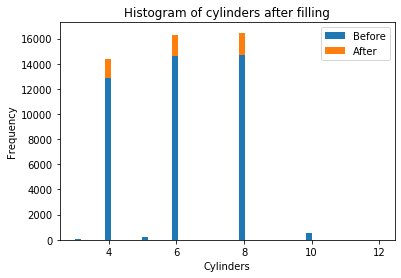

In [15]:
plt.figure()
plt.hist(df['cylinders'], bins=50)

cyl_fill_ref = cyl_comb_val.unstack().idxmax(axis=1)
cyl_fill_ref.name = 'cylinders'
cyl_na = df['cylinders'].isna()

df.loc[cyl_na, 'cylinders'] = (
    df[cyl_na].apply(
        lambda x: cyl_fill_ref[x['model']], 
        axis=1
    )
)
plt.hist(df['cylinders'], bins=50, zorder=-1)
plt.title('Histogram of cylinders after filling')
plt.legend(['Before', 'After'])
plt.xlabel('Cylinders')
plt.ylabel('Frequency')
plt.show()

In this graph we can see the effects of filling in cylinder values. The values have been filled in a proportion similar to what we already had in the histogram. Therefore, we can conclude the strategy used for filling was satisfatory.

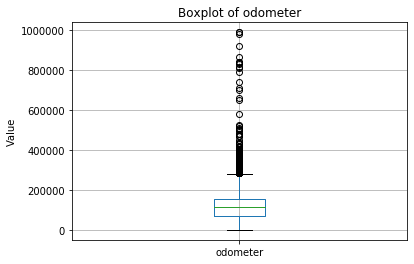

In [16]:
df.boxplot('odometer')
plt.title('Boxplot of odometer')
plt.ylabel('Value')
plt.show()

As we can see from the boxplot of the mileage of vehicles, the third quartile, which is the max value that comprises 75% of the data, stands at the top of the box on 155000 and the upper whiskers mark the threshold of what we will consider as outliers. By looking at this graph, we can quickly check where this threshold is located and have an initial guess at whether the missing values will be filled in with the mean or the median. For this data set, we will use the mean after confirming the percentage of outliers is small.

In [17]:
print(f"Percentage of outliers: {df[ df['odometer'] > 250000]['odometer'].count()/df.shape[0]:.3%}")
print(f"Values will be filled with the mean {df['odometer'].mean():.0f}")

Percentage of outliers: 2.019%
Values will be filled with the mean 115425


In [18]:
df['odometer'].fillna(int(df['odometer'].mean()), inplace=True)

In [19]:
df['paint_color'].fillna('unknown', inplace=True)

In [20]:
df['is_4wd'].fillna(0, inplace=True)

In [21]:
na_pct = (df.isna().sum()/df.shape[0])
na_pct = na_pct[na_pct != 0]
if na_pct.empty:
    print('There are no missing values.')
else:
    rint(f"Rows with missing values: \n{na_pct}")


There are no missing values.


#### Results
Missing variables have been deleted or filled in correctly. The impact of filling in cylinders has been calculated using a histogram, a graph that allows visualization of frequency of values in a column. Another graph has been used to analyze outliers in mileage. Odometer has been filled considering the impacts of outliers, and a boxplot shows exactly the entries out of the quartile ranges.

### Correcting data types

#### Explanation

The code must be able to correctly identify the type of data for the entries, such as what is text, what is numeric or what represents time. This information about the type of data is strictly necessary to correctly analyze using graphics and functions. Numbers with float point will be changed into integers for better visualization, times displayed as text will be transformed into time objects and information of True/False will be turned into boolean.

#### Code

In [22]:
df[['model_year', 'cylinders', 'odometer']] = df[['model_year', 'cylinders', 'odometer']].astype('int64', errors='raise')

In [23]:
df['is_4wd'] = df['is_4wd'].astype(bool)

In [24]:
df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')

In [25]:
df[['model_year', 'cylinders', 'odometer', 'is_4wd', 'date_posted']].dtypes

model_year              int64
cylinders               int64
odometer                int64
is_4wd                   bool
date_posted    datetime64[ns]
dtype: object

#### Results


Now the data for date posted can be acessed and used for calculations on time in a much easier way. Additionally, visualizing integers instead of float point numbers is much easier on the eyes.

### Dictionaries

#### Explanation

Creating dictionaries is useful for a handful of reasons. Using numbered IDs helps with security of the data, it can also help with numeric methods in cases were categories describe quality, and it makes it much easier to change the text displayed for each category. In this case, the 'condition' col will be turned into numeric and have a reference table to access the condition as text.

#### Code

In [26]:
cond_unique = df['condition'].unique()
cond_unique

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [27]:
cond_list = [2, 4, 1, 3, 0, 5]

cond_df = []
for cond_id, condition in zip(cond_list, cond_unique):
    cond_df.append(
        {
            'condition': cond_id,
            'condition_text': condition
        }
    )

condition_ref = pd.DataFrame(cond_df).sort_values('condition')

condition_ref

,condition,condition_text
4,0,salvage
2,1,fair
0,2,good
3,3,excellent
1,4,like new
5,5,new


In [28]:
df['condition'].replace(cond_unique, cond_list, inplace=True)
df['condition'].unique()

array([2, 4, 1, 3, 0, 5])

#### Results

For the 'condition' column, data has been categorized in a scale from 0 to 5, describing condition from salvage to new. This will allow numeric methods to be applied over the column. A reference table has been created to get the text information back when necessary, stored in the variable <code>condition_ref</code>

### Calculation

#### Explanation

At this point, calculations to create new columns based on available data will be made to obtain useful information, such as weekdays for dates, or percentages, or average values. In some cases, this information is much more detailed and straightfoward than the raw data. A good example is the calculation of vehicle ages, which will be done using the difference between car model and the date of posting the ad.

#### Code

In [29]:

df['weekday'] = df['date_posted'].apply(lambda x: x.weekday())
df['weekday_name'] = df['date_posted'].apply(lambda x: x.day_name())
df['day'] = df['date_posted'].apply(lambda x: x.day)
df['month'] = df['date_posted'].apply(lambda x: x.month)
df['year'] = df['date_posted'].apply(lambda x: x.year)


In [30]:
df['vehicle_age'] = df['year'] - df['model_year']
df['vehicle_age']

0         7
2         6
3        16
4         2
5         4
         ..
51520     5
51521    16
51522     9
51523     5
51524     4
Name: vehicle_age, Length: 47906, dtype: int64

In [31]:
df['mileage_year'] = df['odometer']/df['vehicle_age'].replace(0, 1)

In [32]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday,weekday_name,day,month,year,vehicle_age,mileage_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,5,Saturday,23,6,2018,7,20714.285714
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,3,Thursday,7,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,115425,automatic,pickup,unknown,False,2019-03-22,9,4,Friday,22,3,2019,16,7214.062500
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,1,Tuesday,2,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2,Wednesday,20,6,2018,4,14488.500000


#### Results

A few columns have added:
    
- Weekday when the add was posted.
- Day of the month when the ad was posted.
- Month when the add was posted.
- Year when the add was posted.
- Vehicle age, subtracting model year from the day it was listed
- Mileage per year, dividing total mileage by the car age

### Conclusion

Many things were done in this section. First, all issues found during data validation have been found, except unusual values that will be looked into during analysis. Missing values and data types have been corrected, and new columns created. These columns include specific values about the date the car was posted, the vehicle age by subtracting model year from the year it was posted and average mileage per year. This will help with analysis in the next section.

## *Analysis*

### Objective

In this section, we will dive into the data and do our Exploratory Data Analysis. Here we will find useful information to draw conclusions and answer questions related to how the price of a car is defined based on its characteristics.

### Filtering Data

#### Explanation

Data are prone to contain wrong information. That could be related to technical issues, or maybe just to seasonal events. For instance, technical problems, offers, specials cases such as donations could have happened during data acquisition, causing wrong information to show up in our table. For instance, the prices col had ads listed at price 1, and that doesn't seem reasonable. We will filter out using limits for data and exclude outliers, so that we can continue our analysis with filtered data. In order to do that, we will use histograms and boxplots again. These are useful when looking out for outliers.

#### Code

In [33]:
parameters = ['price', 'vehicle_age', 'odometer', 'cylinders', 'condition', 'mileage_year']

df[parameters].describe()

,price,vehicle_age,odometer,cylinders,condition,mileage_year
count,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000,47906.000000
mean,12160.465203,8.556966,115425.376028,6.123012,2.638605,19453.381169
std,10082.453773,6.295266,60013.469811,1.657062,0.711839,17534.750561
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,5000.000000,4.000000,79000.000000,4.000000,2.000000,10493.181818
50%,9000.000000,7.000000,115425.000000,6.000000,3.000000,15077.727273
75%,16900.000000,12.000000,146327.000000,8.000000,3.000000,22428.571429
max,375000.000000,110.000000,990000.000000,12.000000,5.000000,373200.000000


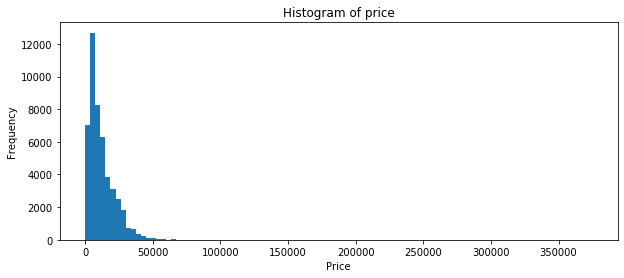

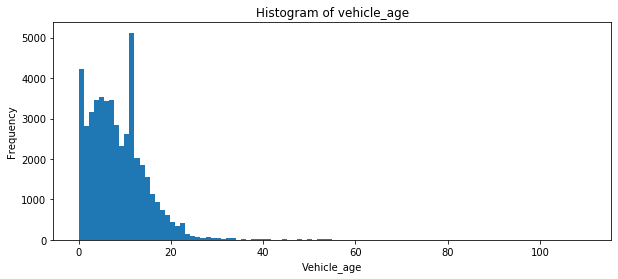

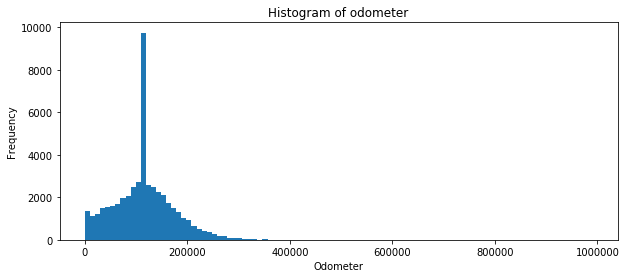

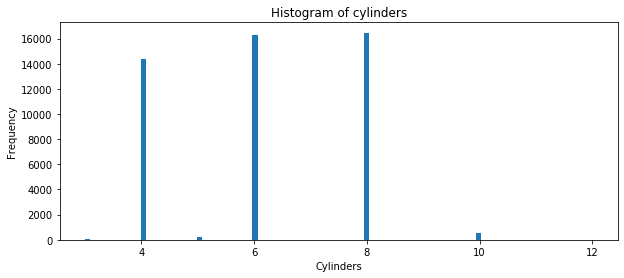

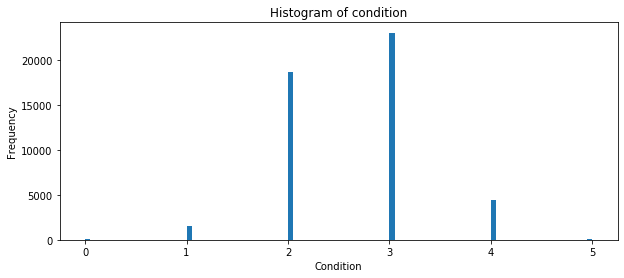

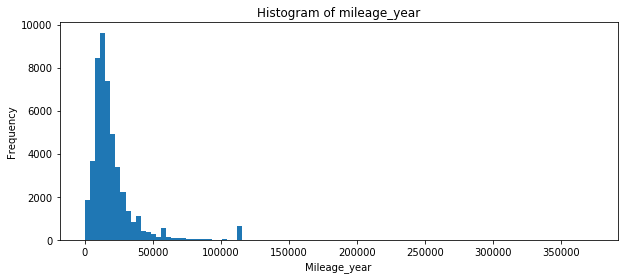

In [34]:
def draw_hist(df, parameters, bin_val):
    for col in parameters:
        plt.figure(figsize=(10,4))
        plt.hist(df[col], bins=bin_val)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col.capitalize())
        plt.ylabel('Frequency')
        plt.show()

plt.show()

draw_hist(df, parameters, 100)

All histograms seem to follow the expected shape: peaks around the median value and descending as values increase or decrease away from the peak center. The histograms of price, odometer, vehicle age and mileage per year show that this data could be filtered to get better estimates when working with the dataset. As for cylinders and condition, we can see that most data revolve around good to excellent condition and in 4, 6 and 8 cylinders. We won't filter the data based on these last two characteristics because that could compromise the representativity of some car types.

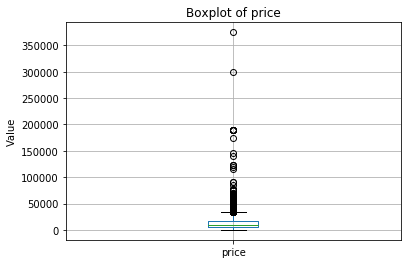

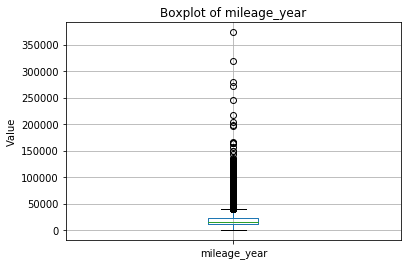

In [35]:
box_param = ['price', 'mileage_year']

for col in box_param:
    df.boxplot(col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel('Value')
    plt.show()

The graphs above show that price and mileage have samples far away from the median and mean, going past the whiskers, which can be used as a reference threshold for outliers. Filtering the dataset past outliers should give us better estimates of mean and median when analyzing characteristics.

In [36]:
filt_df = df.query("1000 <= price <= 50000 and vehicle_age <= 25 and mileage_year <= 50000 and odometer <= 300000")
filt_df = filt_df.reset_index(drop=True)

print('Number of rows:')
print(f"Unfiltered data: {df.shape[0]}")
print(f"Filtered data: {filt_df.shape[0]}")

Number of rows:
Unfiltered data: 47906
Filtered data: 43510


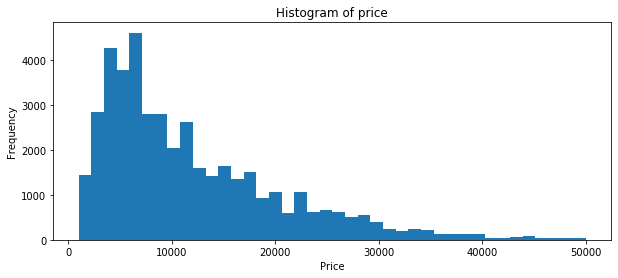

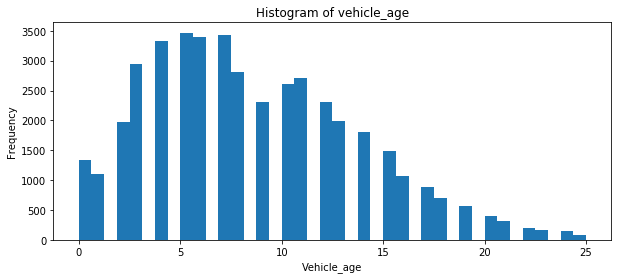

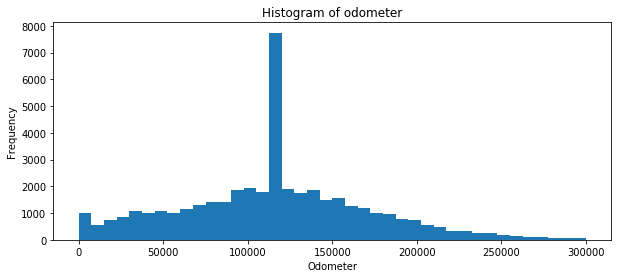

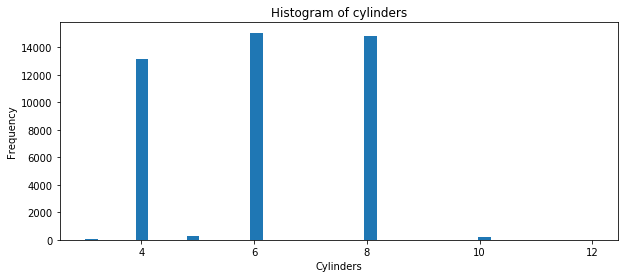

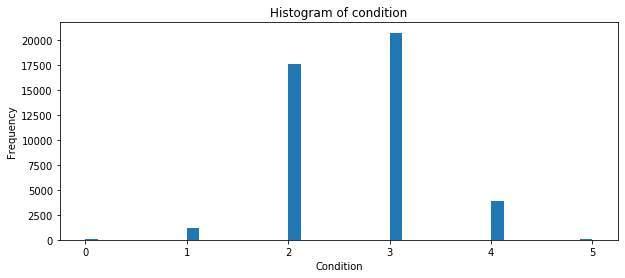

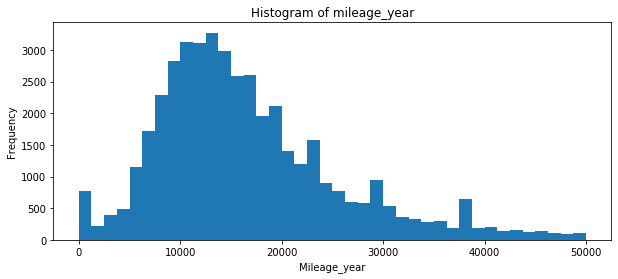

In [37]:
draw_hist(filt_df, parameters, 40)

Now the histograms are more focused on the important values!

#### Results

The analyzed cols include:

    - price
    - vehicle_age
    - odometer
    - number of cylinders
    - condition
    - mileage per year

For each of these cols, the description (<code>.describe()</code>) and the histograms were created. Some prices have been considered unreasonably low, and were filtered out to get better results, considering the lower limit as 1000 dolalrs. Similarly, entries with high values for price (>50,000), vehicle age (>30) and mileage per year(>100,000) have been drawn out. The impact of filtering these entries on car types and models has been measured using a histogram for car type and percentage per car model, and it isn't significant. After filtering the data, the histograms look much better. After filtering the data, histograms look much more concise and meaningful. They all keep the aspect of a normal gaussian distribution.

### Analyzing early and late sales

#### Explanation

After filtering data, we can start answering questions. What makes an add sell early, and what makes it sell late? We will look for patterns using histograms.

#### Code

count    43510.000000
mean        39.598805
std         28.231087
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


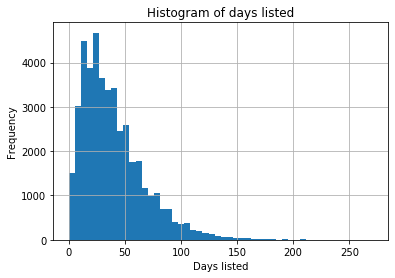

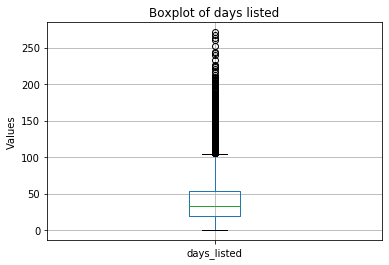

In [38]:
print(filt_df['days_listed'].describe())

filt_df['days_listed'].hist(bins=50)
plt.title('Histogram of days listed')
plt.xlabel('Days listed')
plt.ylabel('Frequency')
plt.show()

filt_df.boxplot('days_listed')
plt.title('Boxplot of days listed')
plt.ylabel('Values')
plt.show()


This histogram of the days listed for ads show that the average lifetime is around 1 month, and most of them won't go past 100 days. This can be proved by the position of whiskers in the boxplot. We should dive deeper to check what patterns can we find out for ads that are removed early or late.

In [39]:
def median_mean(df_query, name):
     return df_query.aggregate(['median', 'mean'], axis=0).T.add_suffix(name)

In [40]:
def categorize_days_listed(row):
    if row['days_listed'] <= 3:
        return 'earlier'
    elif row['days_listed'] <= 10:
        return 'early'
    elif row['days_listed'] <= 90:
        return 'average'
    elif row['days_listed'] > 90:
        return 'late'
        
filt_df['listed_time'] = filt_df.apply(categorize_days_listed, axis=1)

In [41]:
filt_df.pivot_table(columns='listed_time', aggfunc=['median', 'mean'])

median                                     mean                 \
listed_time  average  earlier   early     late        average        earlier   
condition          3        3       3        3       2.627549       2.671642   
cylinders          6        6       6        6       6.090406       6.089552   
day               15       16      15       15      15.441859      15.839891   
days_listed       35        2       8      107      38.602632       2.151967   
is_4wd         False     True   False    False       0.492873       0.521031   
mileage_year   14648  15277.8   14600  15058.2   16578.586675   16985.191028   
model_year      2011     2011    2011     2010    2009.735581    2009.972863   
month              7        7       7        7       6.589803       6.814111   
odometer      115425   115425  115425   115425  115487.013322  115890.769335   
price           9000     9900    8995     8999   11911.902961   12064.744912   
vehicle_age        8        7       8        8       8.578509       8.325645   
weekday            3        3       3        3       3.003043       2.868385   
year            2018     2018    2018     2018    2018.314090    2018.298507   

                                            
listed_time           early           late  
condition          2.632535       2.649559  
cylinders          6.083706       6.063352  
day               15.493814      15.444667  
days_listed        7.369044     114.329992  
is_4wd             0.480916       0.495188  
mileage_year   16554.300690   16877.697015  
model_year      2009.718347    2009.820770  
month              6.569360       6.566159  
odometer      115612.320874  116152.750200  
price          11787.737563   11762.929431  
vehicle_age        8.593314       8.498797  
weekday            2.970519       3.015638  
year            2018.311661    2018.319567

In [42]:
def analyze_time(df, index, values, pct):
    pivot = df.pivot_table(columns='listed_time', index=index, values=values, aggfunc='count', margins=True, margins_name='total_count')
    pivot = pivot.drop(index='total_count')
    if pct == True:
        total = pivot['total_count']
        pivot = pivot.divide(pivot['total_count'], axis=0)
        pivot = pivot*100
        pivot.loc['mean', :] = pivot.mean()
        pivot = pivot.round(decimals=3)
        pivot['total_count'] = total
    pivot = pivot.sort_values('total_count', ascending=False)
    return pivot
    

In [43]:
print('----------------------------------------------------- \
        \n Analysys of columns by days listed (%): \
     \n-----------------------------------------------------')
for col in cat_cols:
    print()
    print(analyze_time(filt_df, col, 'days_listed', True))

-----------------------------------------------------         
 Analysys of columns by days listed (%):      
-----------------------------------------------------

listed_time  average  earlier   early    late  total_count
cylinders                                                 
6             84.104    1.667   8.702   5.527      15054.0
8             83.823    1.706   8.746   5.725      14830.0
4             83.605    1.726   8.730   5.939      13150.0
5             81.224    0.816  11.020   6.939        245.0
10            85.000    2.000   7.000   6.000        200.0
3             79.310      NaN  10.345  10.345         29.0
12           100.000      NaN     NaN     NaN          2.0
mean          85.295    1.583   9.091   6.746          NaN

listed_time  average  earlier   early   late  total_count
condition                                                
3             83.833    1.741   8.525  5.902      20740.0
2             84.020    1.623   8.725  5.632      17559.0
4           

The percentage distribution of characteristics in cars sold doesn't change much according to the duration of ads. The analysis here is made by checking how does the percentage of ads that fit a required value for each characteristics changes with duration of days listed. A few observations will be made in the results of this section.


#### Results

Most ads are listed for up to 3 months, but the average is around 1 month. We have thoroughly looked for patterns in differences between very early (within 4 days), early (within 11 days), average (between early and late) and late (after 90 days). Here are the results:

    - Purple cars are more likely to be sold the earliest, when compared with other colors of cars;
    - As for type, the same can be told about mini-vans, wagons and hatchbacks; 
    - Probability of hybrid cars sold the earliest is higher than for other types of transmission;
    - Hybrid cars in general have higher rates of being sold earlier than other fuel types;
    - New cars rates of being sold late is 2 times lower.
    - The percentage of offroad cars being sold late is higher than for other cars;
    - Cars in conditions fair are less likely to be sold late, this could be due to their prices.
    - Cars in conditinos good and excellent are more likely to be sold late.

The resulting tables are very informative and definitely have usage in defining what types of cars ads are more likely to be removed at what time.

### Analyzing prices

#### Explanation

In this section we will define what characteristics have the most impact on prices. To do that, we will plot scatter plots, which help track how a variable changes according to variations on another variable. Categorical variables can't be used with scatter plots, so boxplots will be used to check prices based on individual charateristics.

#### Code

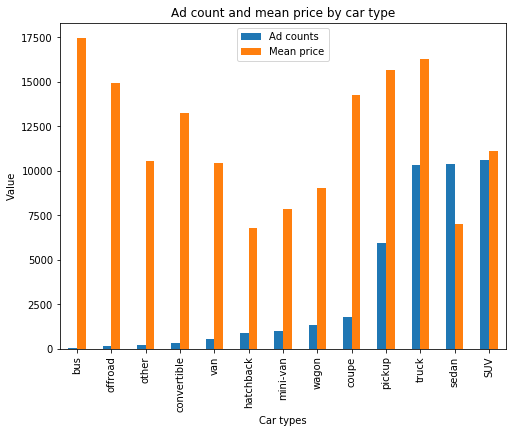

In [44]:
pivot_type = filt_df.pivot_table(index='type', values='price', aggfunc=('count', 'mean')).sort_values('count')
pivot_type.columns = ['count', 'mean_price']

pivot_type.plot(kind='bar', figsize=(8,6))
plt.ylabel('Value')
plt.xlabel('Car types')
plt.legend(['Ad counts', 'Mean price'])
plt.title('Ad count and mean price by car type')
plt.show()

Although not the highest priced, the most sold types of cars in count are trucks, sedan and SUV.

In [45]:
sts = filt_df.query('type in ["SUV", "truck", "sedan"]')

anprice_num = ['price', 'vehicle_age', 'odometer', 'condition']
anprice_cat = ['paint_color', 'transmission', 'type', 'cylinders']

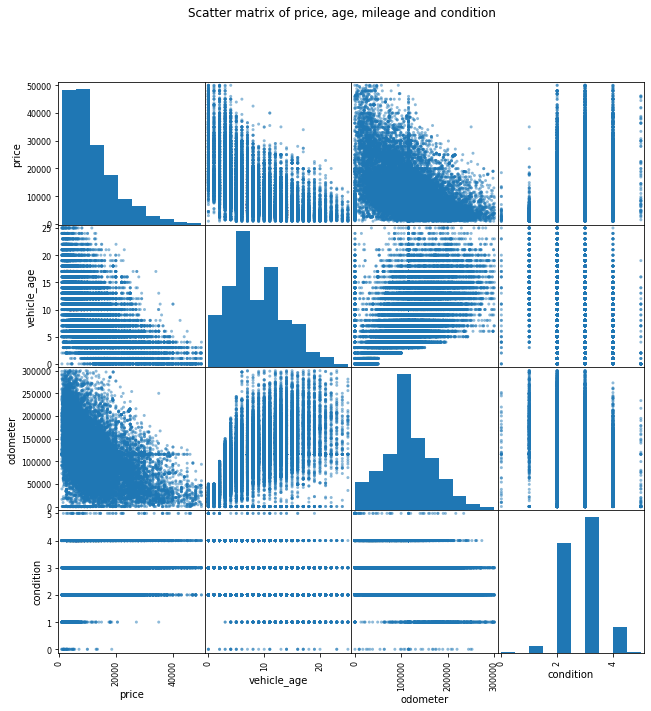

In [46]:
pd.plotting.scatter_matrix(sts[anprice_num], figsize=(10.5,10.5))
plt.suptitle('Scatter matrix of price, age, mileage and condition')
plt.show()

The figure above shows correlation between a few variables. Data which increases along the horizontal axis shows positive correlation, while data that decreases along the horizontal axis shows negative correlation. This can help us check the impact of each variable on another.

In [47]:
filt_df[anprice_num].corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.583509,-0.489355,0.232764
vehicle_age,-0.583509,1.000000,0.555689,-0.278213
odometer,-0.489355,0.555689,1.000000,-0.264653
condition,0.232764,-0.278213,-0.264653,1.000000


In [49]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

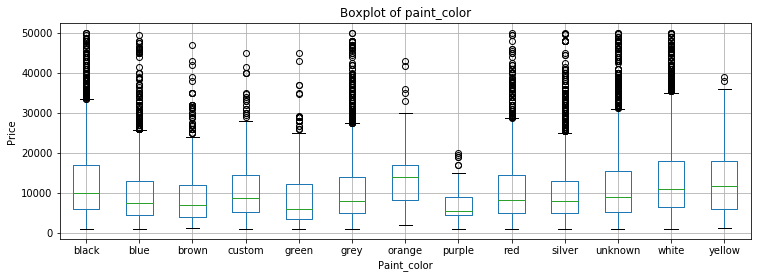

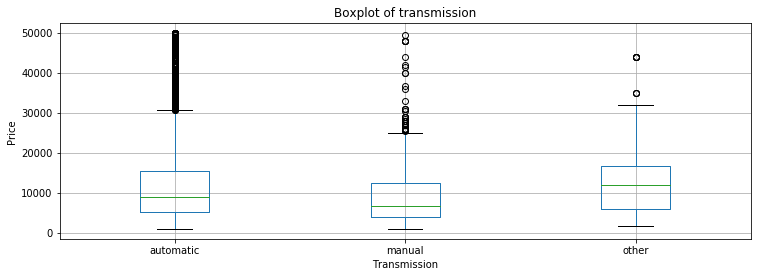

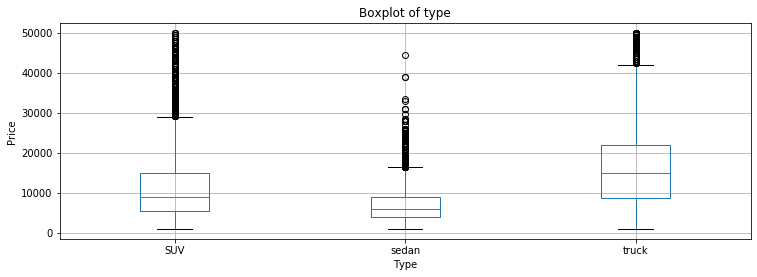

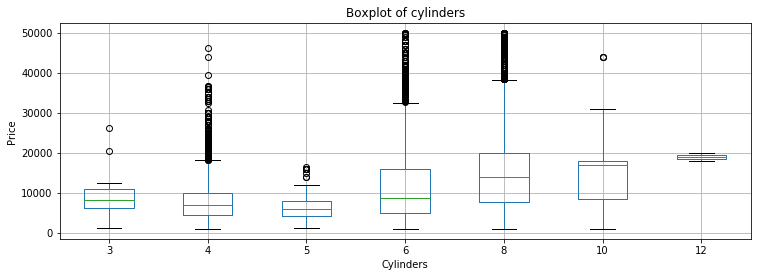

In [50]:
for col in anprice_cat:
    sts.boxplot(column='price', by=col, figsize=(12,4))
    plt.suptitle('')
    plt.ylabel('Price')
    plt.xlabel(col.capitalize())
    plt.title(f'Boxplot of {col}')
    
    ## The warning seems to be related to pandas x numpy version. I couldn't find a workaround.

The graphs above help show the distribution of qualitative variables regarding price. This will help show which categories have higher median and mean prices, and more outlier values for prices. As we can see, trucks have much higher prices in general than SUVs, which have higher prices than sedans. With the boxplots, we can check how this is distributed. We can confirm cars with transmission 'other' have higher prices and also cars with 8 cylinders are the most valuable.

#### Results

By the calculated graphs and tables, we can get to some conclusive results. As expected, both odometer and vehicle age have a high impact, which is inversely proportional: the lower these values, the higher the price. The good condition of the car shows a positive correlation with the price, but not as much as the mileage and vehicle age. As for the number of cylinders, they play a significant role in price until 8 cylinders. Generally, black and white cars are more valuable than other colors.




## *Overall conclusion*

To summarize this project, we have investigated the data from a table of car ads in order to draw results about what makes a listing for a car get removed faster and what characteristics are the most influential in a vehicle's price. The main steps were checking the overall characteristics available, fixing issues such as missing values with clever methods and analyzing the filtered data. The main results regarding time were tables that can provide a lot of information on relative times of ads being removed. The most common car types sold were SUVs, trucks and sedans, and their prices are mostly correlated with their model years and the mileage, while condition plays a less significant role. The higher the vehicle age or the mileage, then the lower the car's price. On the other hand, a better condition means a more expensive car. Additionally, information regarding medians and means were gathered using histograms and boxplots, which are available along the analysis section.